<a href="https://colab.research.google.com/github/greyhound101/data/blob/master/learning_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


In [2]:

from keras.optimizers import *
import cv2
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model
import keras
import pandas as pd
from keras.applications.nasnet import NASNetMobile, preprocess_input
import imgaug as ia
from imgaug import augmenters as iaa
import h5py
from keras.optimizers import Adam
import cv2
from keras.utils import to_categorical
from matplotlib import pyplot as plt
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model


Using TensorFlow backend.


In [3]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

In [4]:

#shuffle samples
def unison_shuffled_copies(items):
    p = np.random.permutation(len(items[0]))
    return [item[p] for item in items]




#change targets
def change(img):
    resized = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA )
    return resized




#get train and test splits
def get_trn_tst(df,tst_fold):
  dimension=224
  idx=np.asarray(df['fold'])
  y=np.asarray(df['label'])
  y-=1
  img=np.asarray(df['image'])
  img1=[]
  img1=np.asarray(img)
  del([img])
  gc.collect()
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img1[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img1[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],dimension,dimension,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],dimension,dimension,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

In [5]:
def load_model(last=True):   
  K.clear_session() 
  mod=densenet.DenseNet121(include_top=True, weights='imagenet')
  out_1=mod.layers[-2].output
  out=Dense(3,activation='softmax')(out_1)
  model=Model(inputs=mod.input,outputs=out)

  if last:
    for i in range(len(model.layers)):
        model.layers[i].trainable = False
  model.layers[-1].trainable=True
  return model

In [7]:
import gc
model=load_model()
ls=[]
for i in range(1,6):
  model.load_weights('lr1_f'+str(i)+'.h5')
  trn,tst=get_trn_tst(df,i)
  pre=model.predict(tst[0])
  predictions=np.argmax(pre,1)
  ls.append(accuracy_score(predictions,tst[1]))
  del([trn,tst])
  gc.collect()
print(np.mean(ls))

0.9310489820274773


In [8]:
import gc
model=load_model()
ls=[]
for i in range(1,6):
  model.load_weights('lr2_f'+str(i)+'.h5')
  trn,tst=get_trn_tst(df,i)
  pre=model.predict(tst[0])
  predictions=np.argmax(pre,1)
  ls.append(accuracy_score(predictions,tst[1]))
  del([trn,tst])
  gc.collect()
print(np.mean(ls))

OSError: ignored

In [10]:
  model.load_weights('fold5lr2.h5')
  trn,tst=get_trn_tst(df,i)
  pre=model.predict(tst[0])
  predictions=np.argmax(pre,1)
  ls.append(accuracy_score(predictions,tst[1]))
  del([trn,tst])
  gc.collect()

7

In [11]:
print(np.mean(ls))

0.911876101357613


In [12]:
import gc
model=load_model()
ls=[]
for i in range(1,6):
  model.load_weights('fold'+str(i)+'lr3.h5')
  trn,tst=get_trn_tst(df,i)
  pre=model.predict(tst[0])
  predictions=np.argmax(pre,1)
  ls.append(accuracy_score(predictions,tst[1]))
  del([trn,tst])
  gc.collect()
print(np.mean(ls))

0.954936269858943


In [14]:
import gc
model=load_model()
ls=[]
for i in range(1,6):
  model.load_weights('fold'+str(i)+'lr5.h5')
  trn,tst=get_trn_tst(df,i)
  pre=model.predict(tst[0])
  predictions=np.argmax(pre,1)
  ls.append(accuracy_score(predictions,tst[1]))
  del([trn,tst])
  gc.collect()
print(np.mean(ls))

0.936160415977703


In [17]:
np.log10([1e-4])

array([-4.])

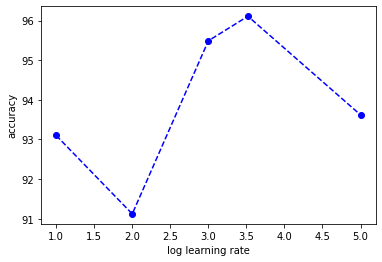

In [20]:
xs=[1,2,3,3.52,5]
ys=[93.10,91.12,95.49,96.11,93.62]
from matplotlib import pyplot as plt
plt.plot(xs,ys,'--bo')
plt.xlabel('log learning rate')
plt.ylabel('accuracy')
plt.savefig('learning_rate_v_accuracy',bbox_inches='tight')